## This notebook is used to train the hybrid model.

In [23]:
from stesml.model_tools import train_model
from stesml.model_tools import test_model
from stesml.model_tools import get_T_from_h_results

from stesml.plot_tools import plot_results
from stesml.plot_tools import save_figures
from stesml.plot_tools import plot_average_error

from stesml.stes_model import stes_model

### Set `plot` to `True` to see visualizations of the results.

In [24]:
plot = False

#### Names of the final models:
**NN model truncated at t <= 360:** 'NN_tmax_360'

**XGBoost model truncated at t >= 360:** 'XGBoost_tmin_360'

#### Load these models or train new models.# Train the XGBoost model for t >= 360

### Train the XGBoost model for t >= 360

In [25]:
data_dir = "../data/Sulfur_Models/heating/full_runs"
model_name = 'XGBoost_tmin_360'
model_type = 'XGBoost' # Options: NN, XGBoost, RandomForest
target = 'h' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = False # Normalize data to a mean of 0 and STD of 1
t_min = 360
truncated = False

### Optionally train & save or load a model

In [26]:
train_model_ = True
save_model_ = False
load_model_ = False

In [27]:
if train_model_:
    parameters = stes_model.get_parameters(model_type, truncated)
    model, addendum = train_model(data_dir, model_type, target, scale, parameters, t_min=t_min)

[00:45:51] WARNING: ../src/learner.cc:576: 
Parameters: { "num_boost_round" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[0]	val-rmse:29.84217
[20]	val-rmse:3.22051
[40]	val-rmse:2.65586
[60]	val-rmse:2.48228
[80]	val-rmse:2.38420
[100]	val-rmse:2.30667
[120]	val-rmse:2.25672
[140]	val-rmse:2.23803
[160]	val-rmse:2.21963
[180]	val-rmse:2.22776
[185]	val-rmse:2.22965


In [28]:
if save_model_:
    stes_model.save_model(model, model_type, addendum)

In [29]:
if load_model_:
    model, addendum = stes_model.load_model(model_type, model_name)

### Test the model and get the results
*Note:* If building final model, set t_min to -1 here

In [30]:
t_min = -1 
h_results = test_model(model, model_type, data_dir, target, scale, addendum, t_min=t_min)

RMSE: 55.6583087, R2: 0.0759447


#### Populate a dataframe with the results.

In [31]:
h_df = h_results['test_df']

#### Visualize the results.

In [32]:
if plot:
    (h_df['h'] - h_df['h_hat']).hist(bins=20, range=(-30, 30))

In [33]:
if plot:
    figures = plot_results(h_df, target='h')

In [34]:
if plot:
    figures['AverageError'] = plot_average_error(h_df, target=target)

In [35]:
if plot:
    figures_directory = save_figures(figures)

### Train the NN model for t <= 360

In [36]:
data_dir = "../data/Sulfur_Models/heating/full_runs"
model_name = 'NN_20220828-0219'
#model_name = 'NN_20220708-23'
model_type = 'NN' # Options: NN, XGBoost, RandomForest
target = 'Tavg' # Options: Tavg, h
metric = 'rmse' # Options: rmse, r2
scale = True # Normalize data to a mean of 0 and STD of 1
t_max=360
truncated=True

### Optionally train & save or load a model

In [37]:
train_model_ = True
save_model_ = False
load_model_ = False

In [38]:
if train_model_:
    parameters = stes_model.get_parameters(model_type, truncated)
    model, addendum = train_model(data_dir, model_type, target, scale, parameters, t_max=t_max)

Epoch 1/6
21591/21591 [==============================] - 14s 635us/step - loss: 0.0045 - val_loss: 4.5014e-05
Epoch 2/6
21591/21591 [==============================] - 13s 621us/step - loss: 4.7371e-05 - val_loss: 3.1107e-05
Epoch 3/6
21591/21591 [==============================] - 14s 654us/step - loss: 3.1411e-05 - val_loss: 1.6458e-05
Epoch 4/6
21591/21591 [==============================] - 13s 623us/step - loss: 2.8084e-05 - val_loss: 2.7158e-05
Epoch 5/6
21591/21591 [==============================] - 14s 633us/step - loss: 2.5486e-05 - val_loss: 5.1749e-05


In [39]:
if save_model_:
    stes_model.save_model(model, model_type, addendum)

In [40]:
if load_model_:
    model, addendum = stes_model.load_model(model_type, model_name)

### Test the model and get the results
*Note:* If building final model, set t_max to -1 here

In [41]:
t_max = -1 # If building final model, set t_max to -1 here
T_results = test_model(model, model_type, data_dir, target, scale, addendum, t_max=t_max)

RMSE: 31.0785485, R2: 0.6567922


#### Populate a dataframe with the results.

In [42]:
T_df = T_results['test_df']

#### Add the temperature results to the heat transfer coefficient dataframe.
This brings all the results into one dataframe.

In [43]:
h_df['Tavg_hat'] = T_df['Tavg_hat']

#### Visualize the results.

In [44]:
if plot:
    (T_df['Tavg'] - T_df['Tavg_hat']).hist(bins=20, range=(-30, 30))

In [45]:
if plot:
    figures = plot_results(T_df, target='Tavg')

In [46]:
if plot:
    figures['AverageError'] = plot_average_error(T_df, target=target)

In [47]:
if plot:
    figures_directory = save_figures(figures)

# Get hybrid model results

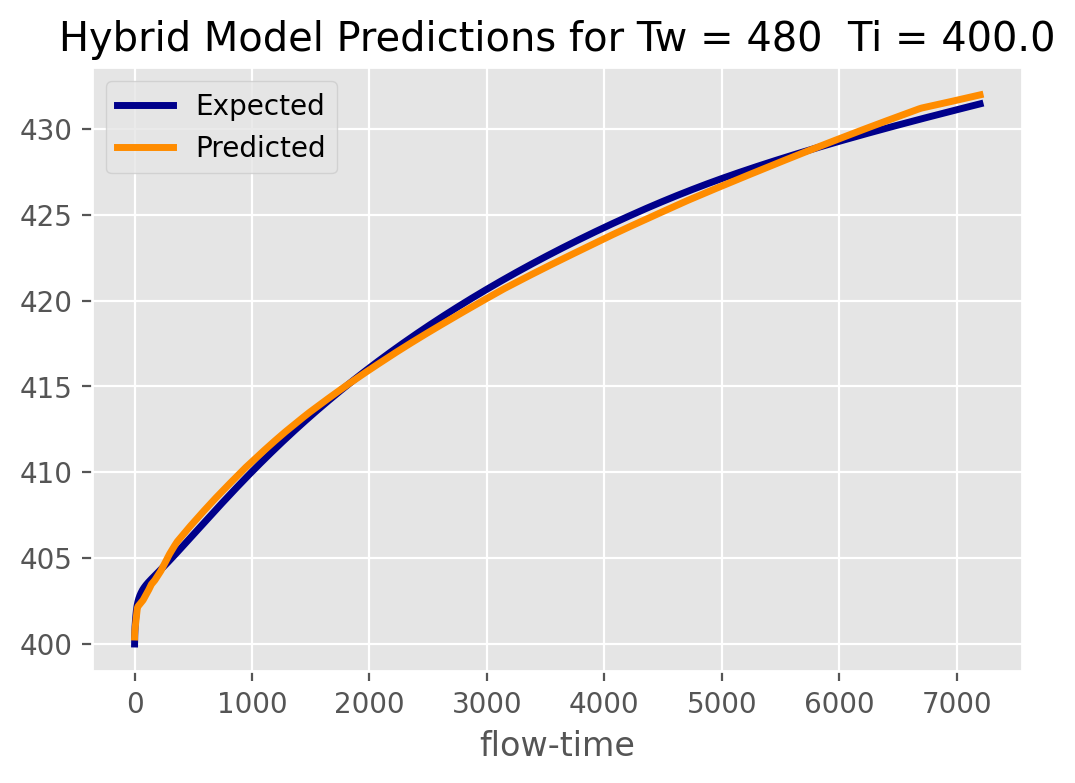

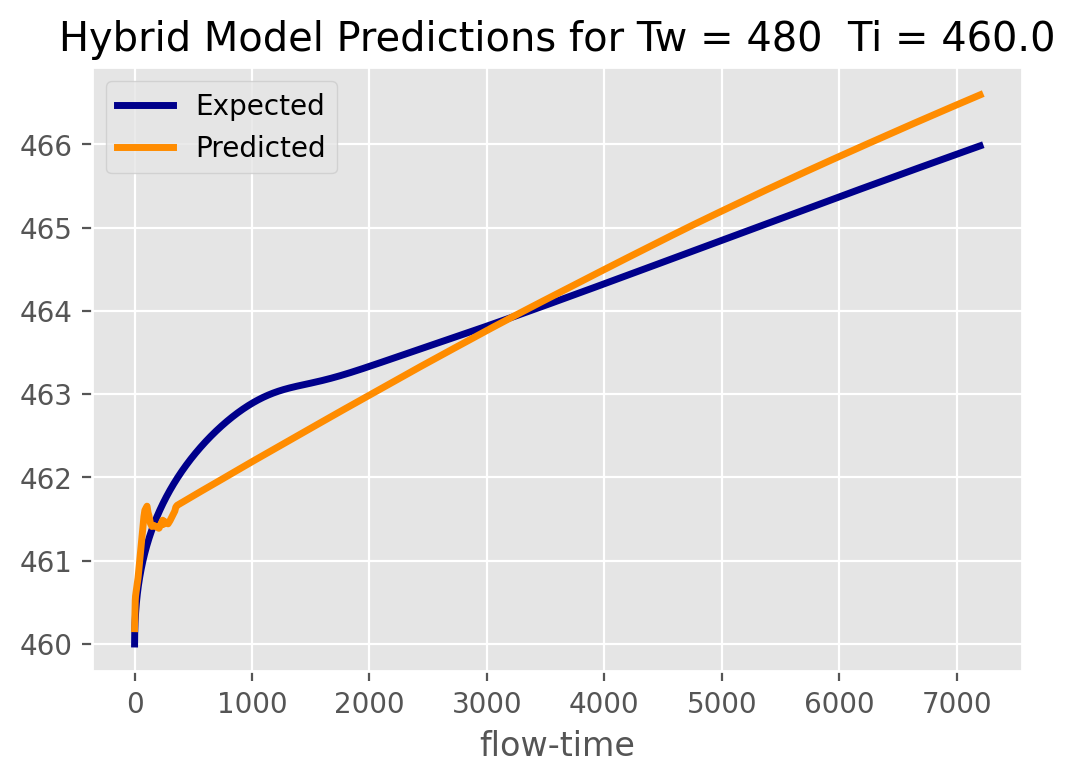

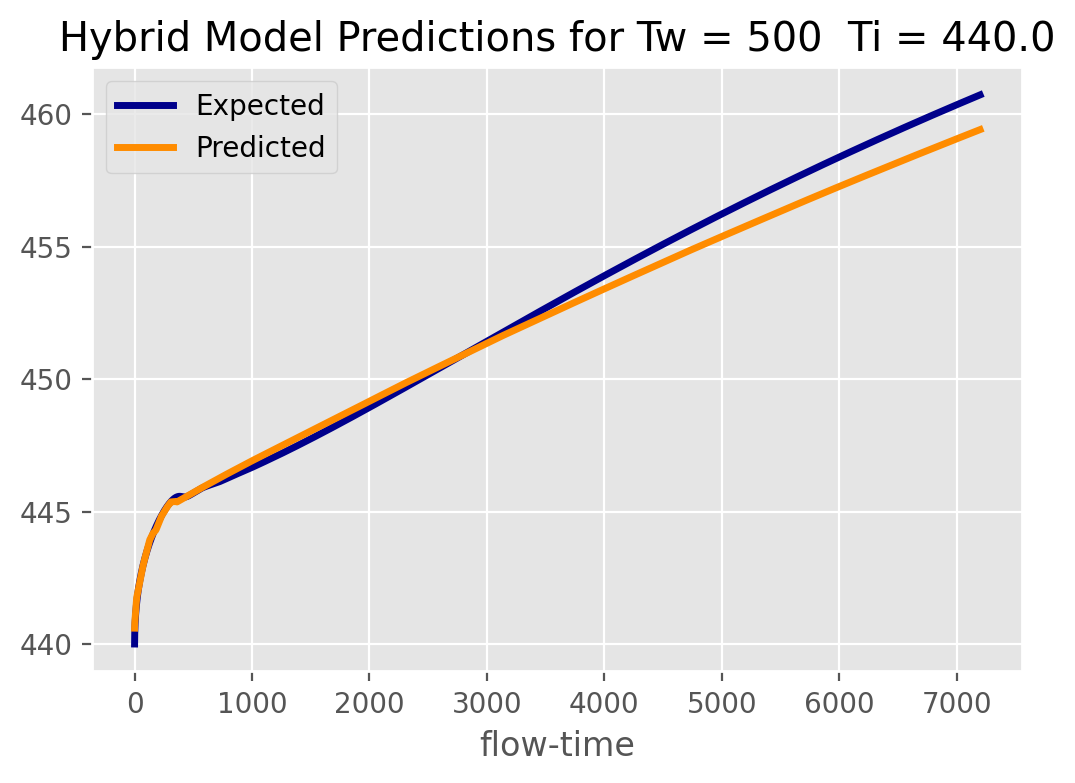

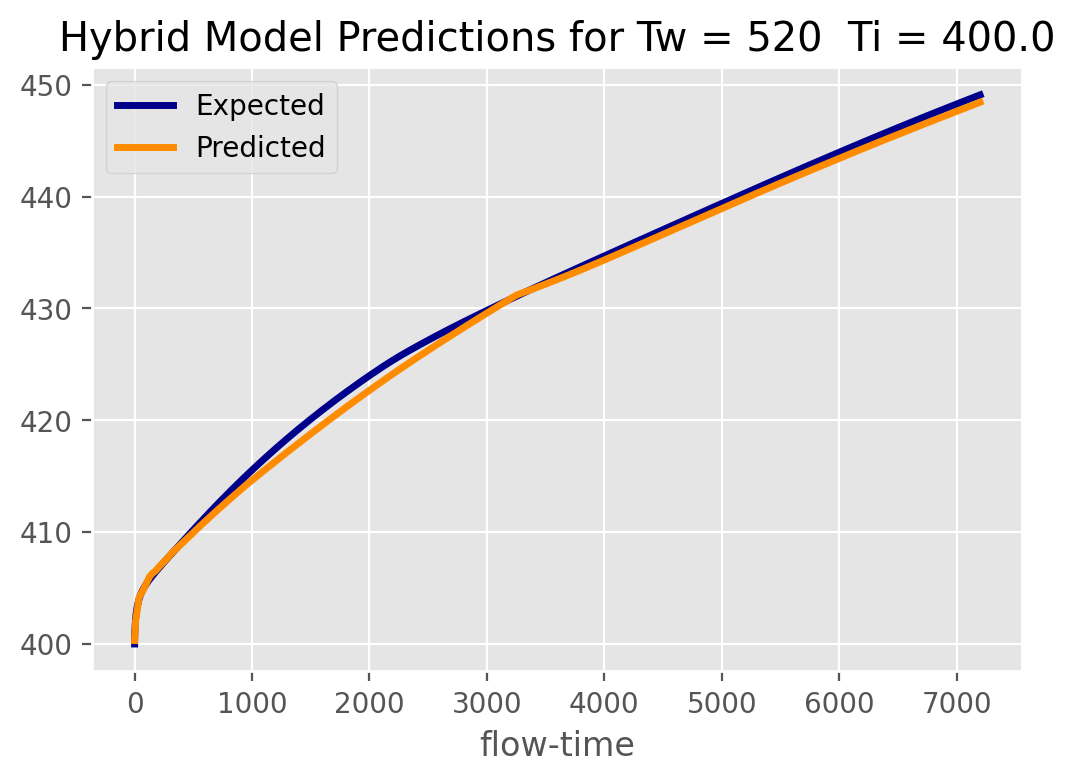

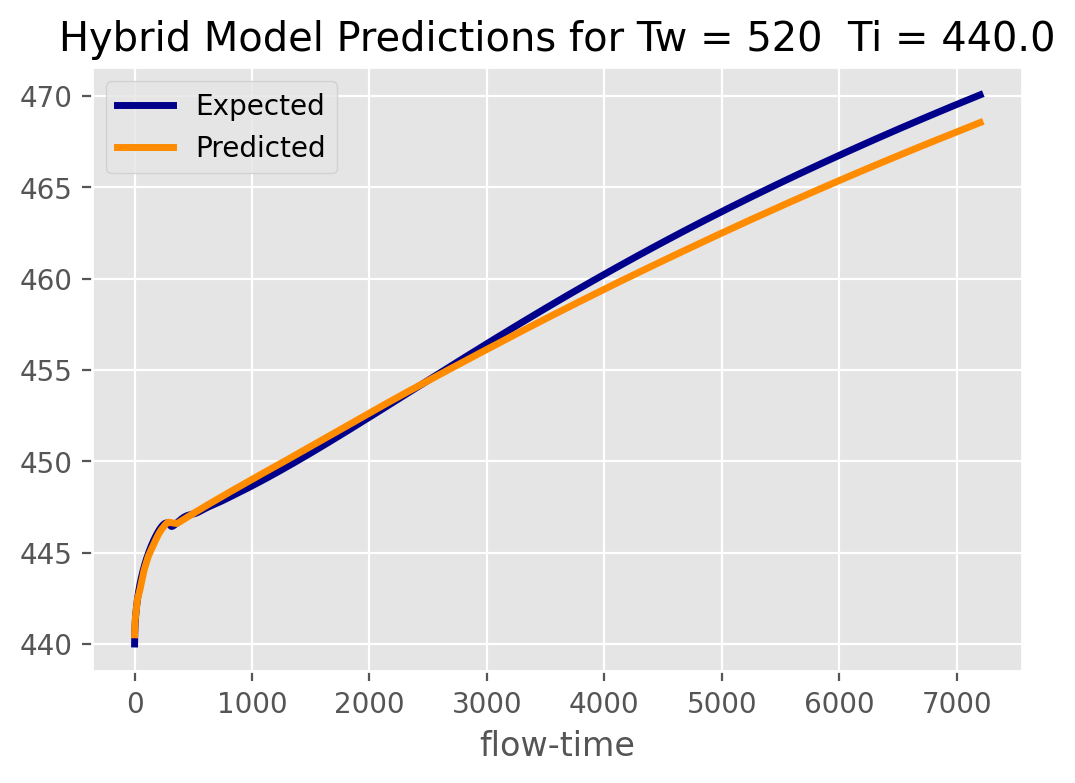

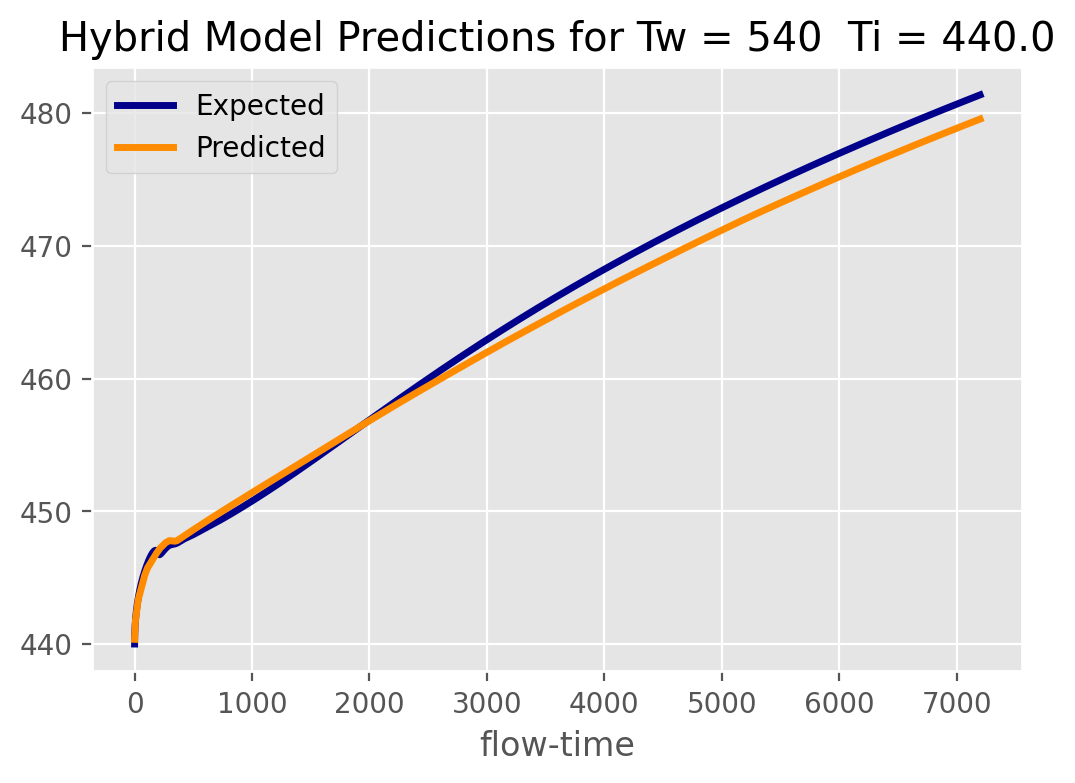

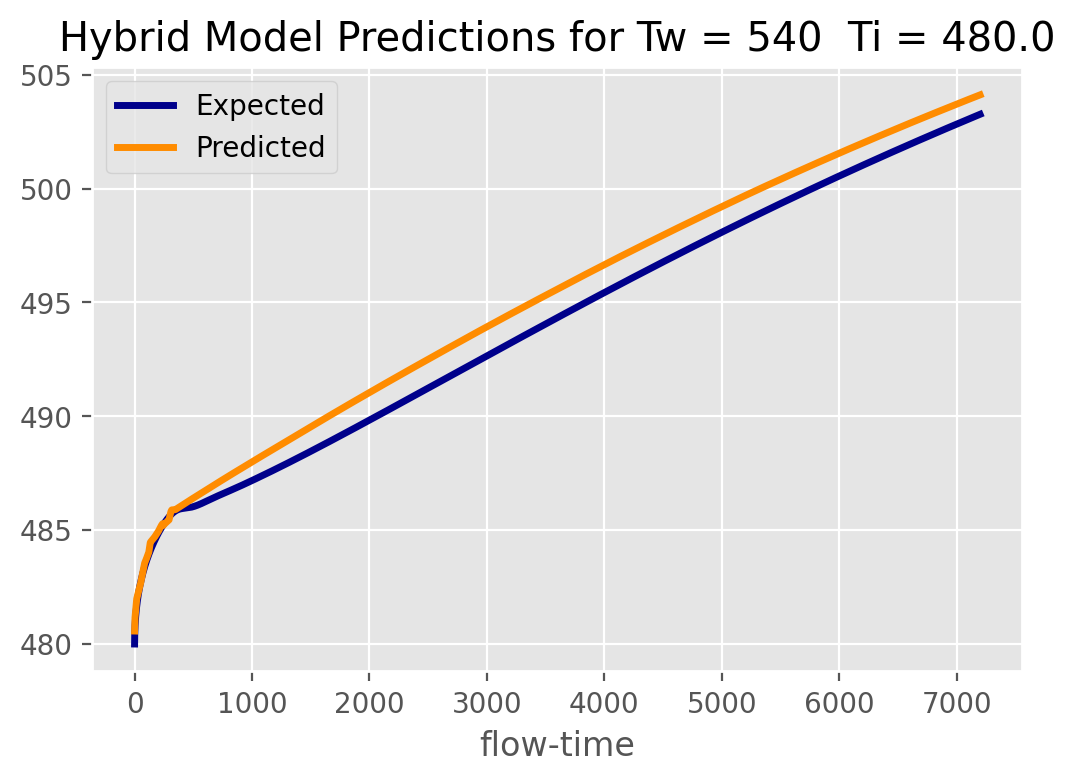

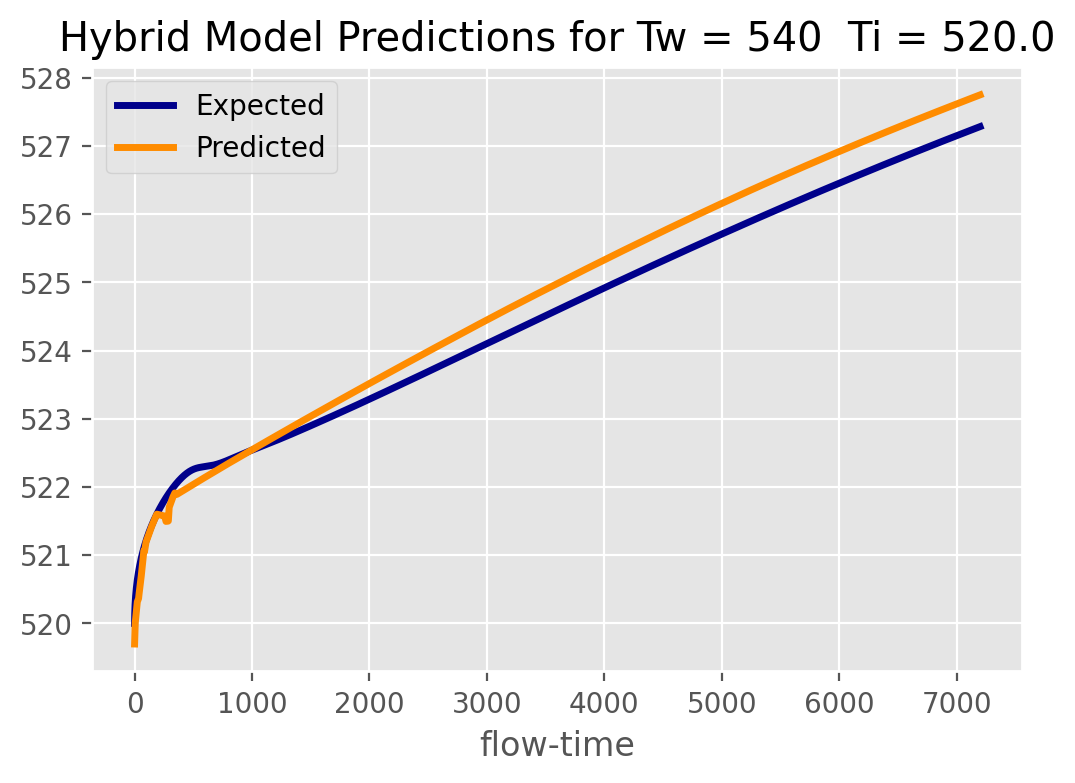

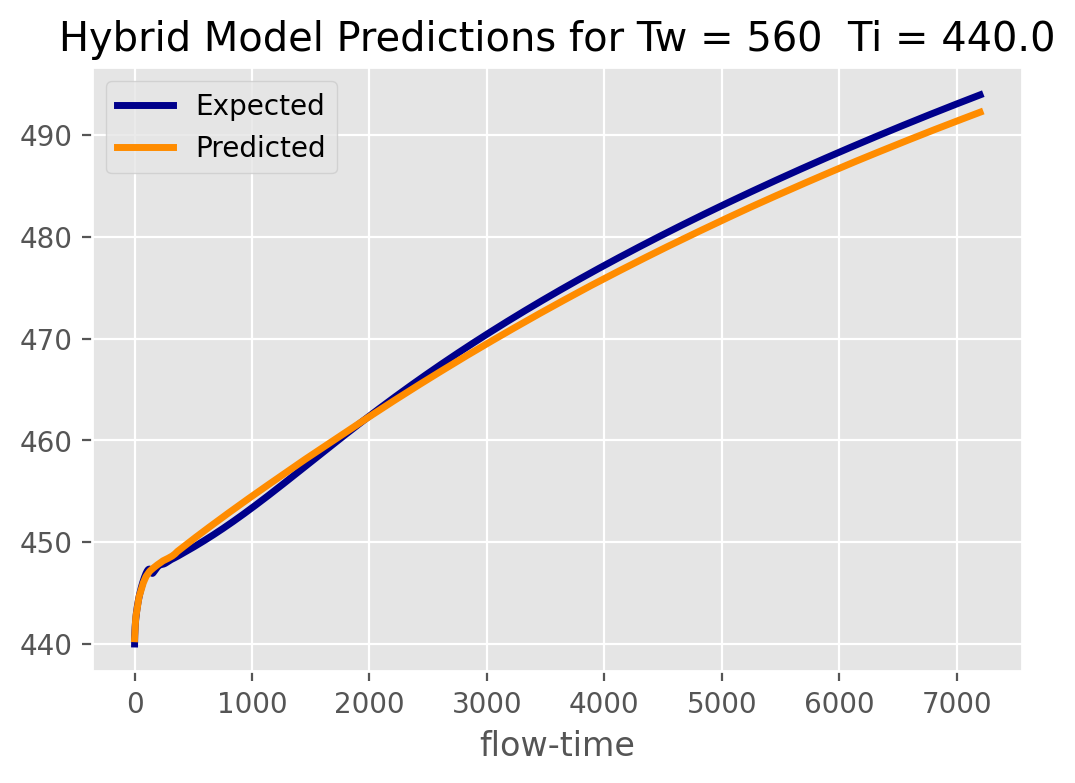

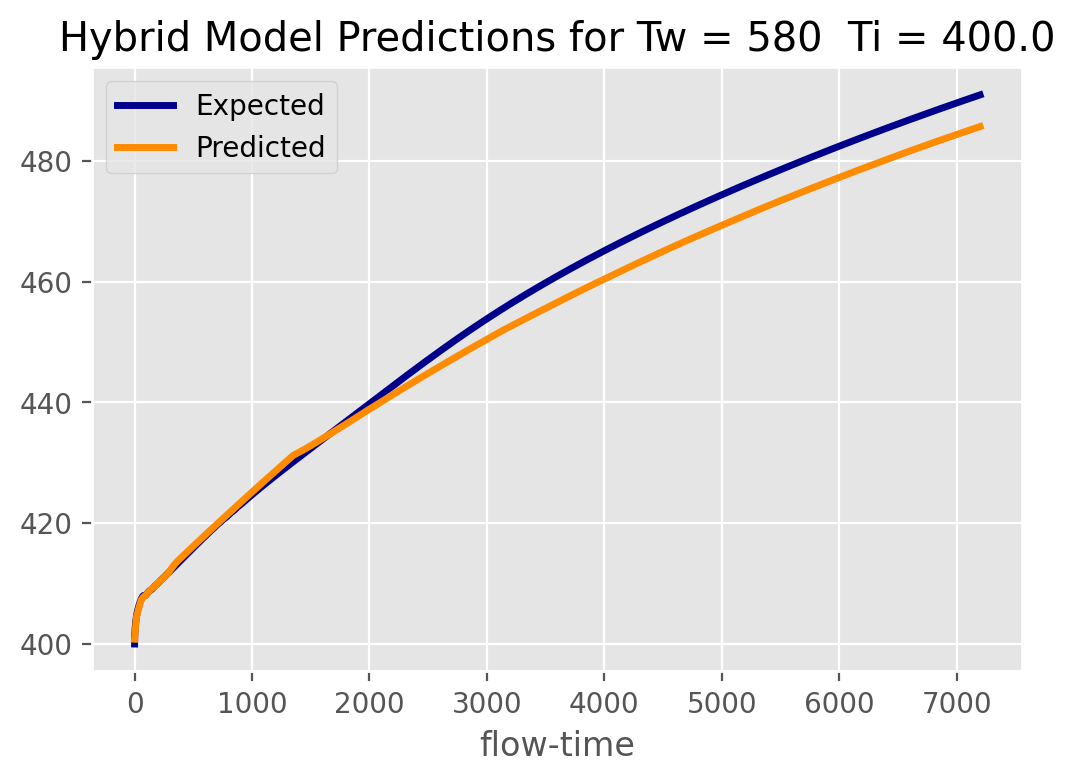

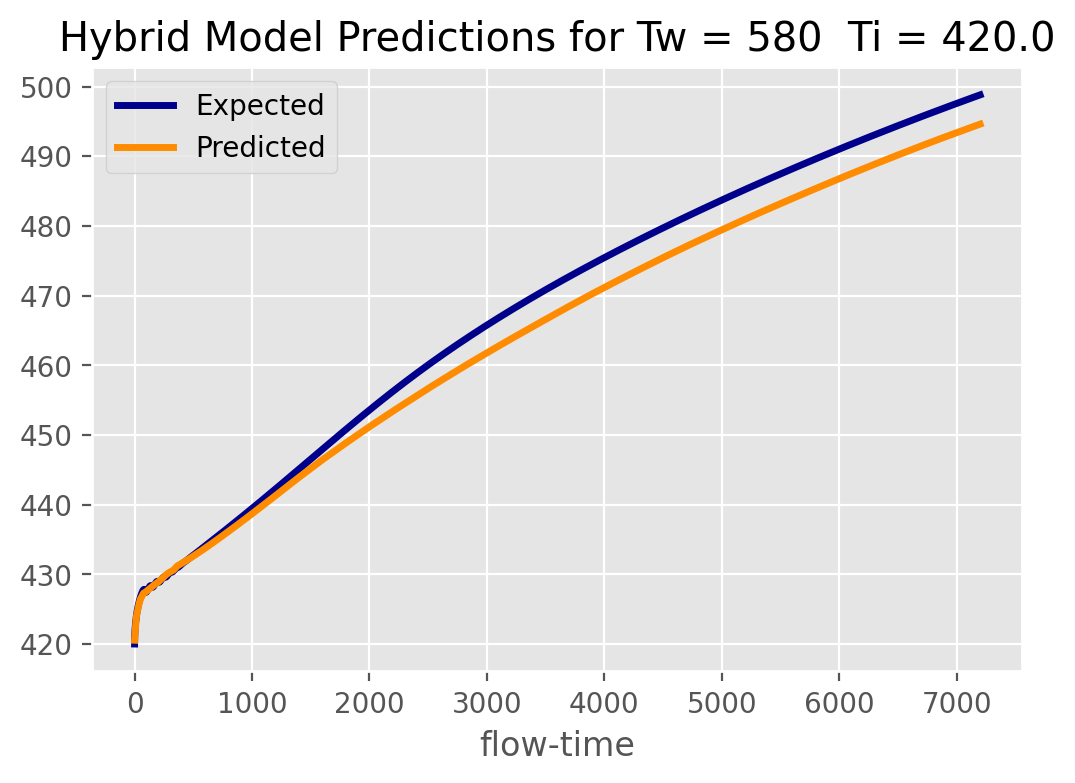

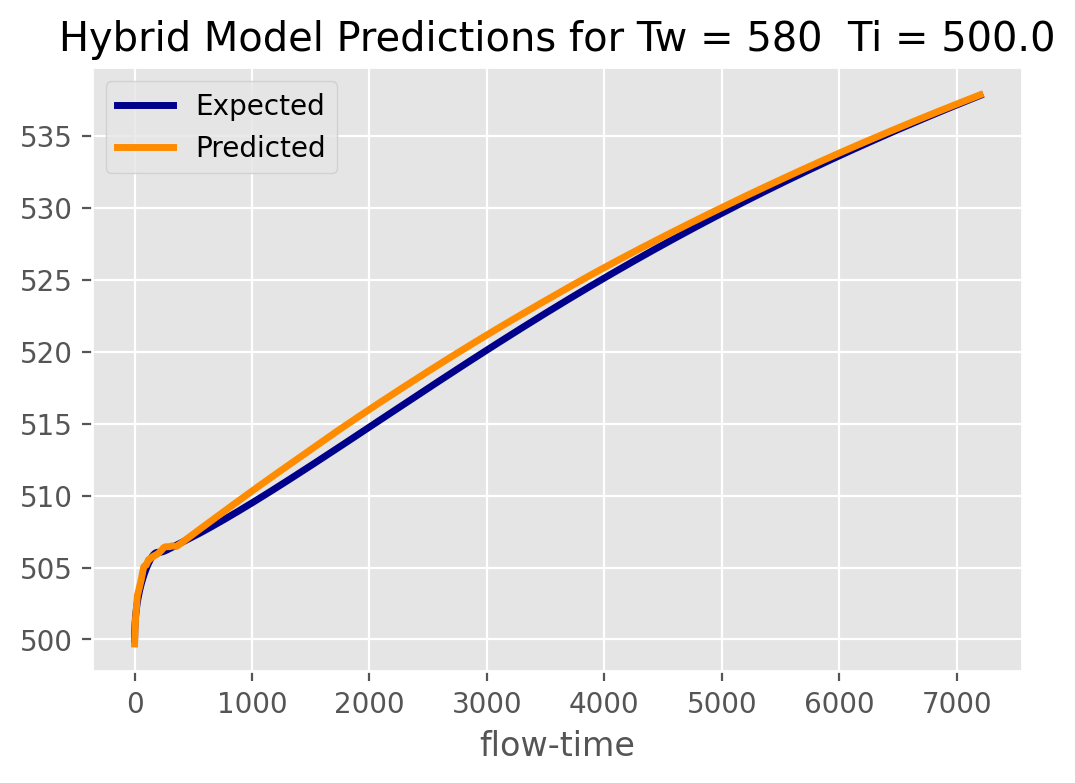

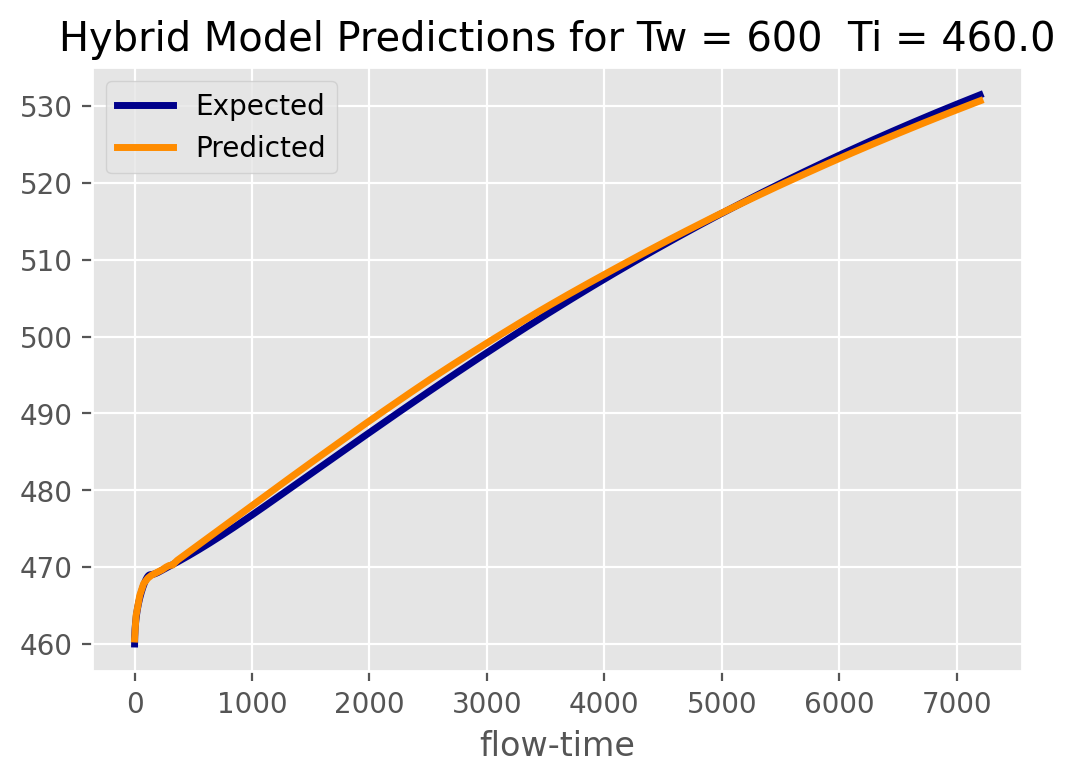

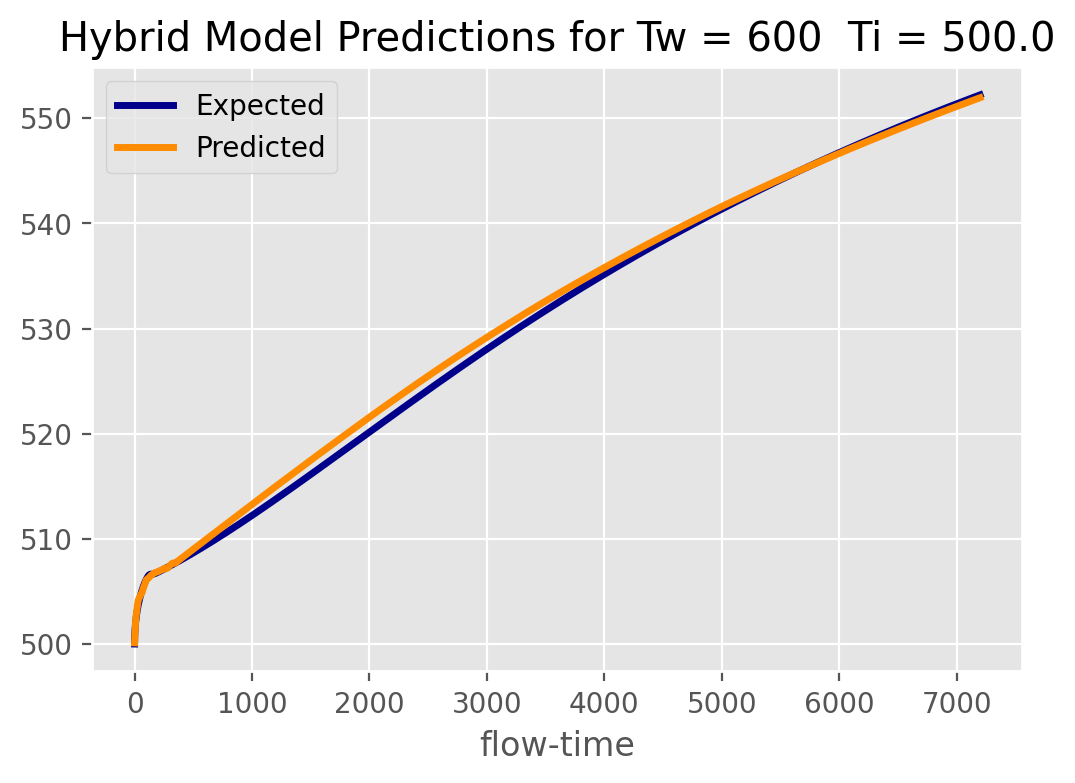

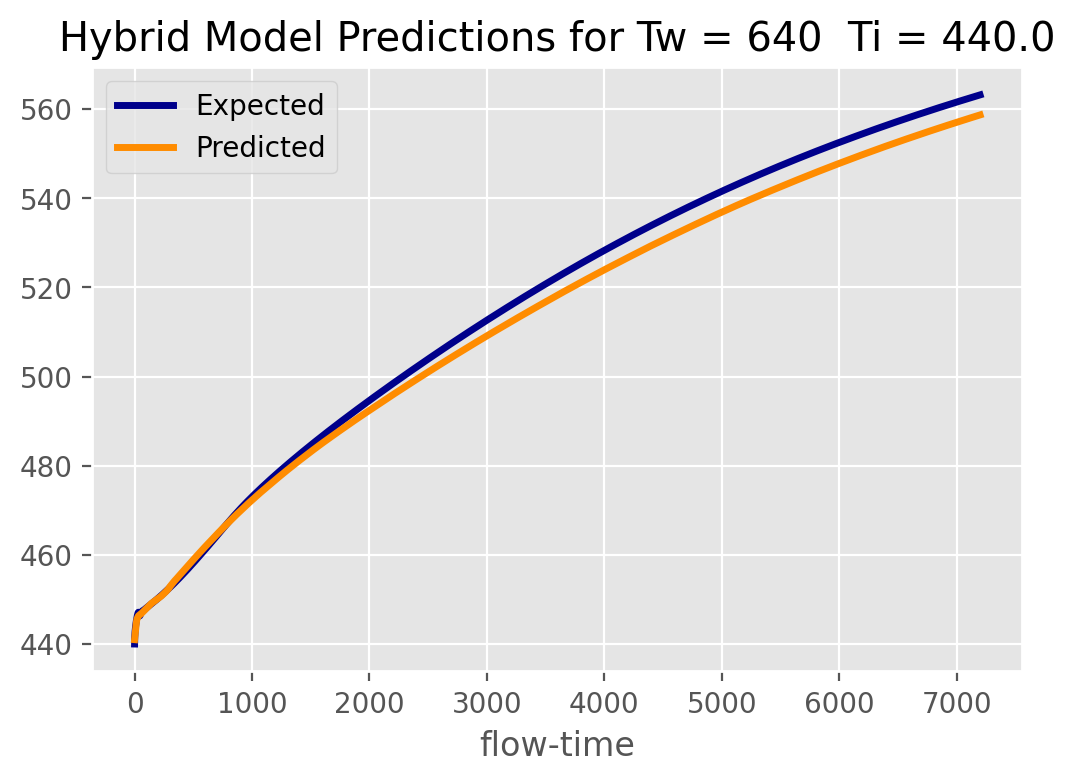

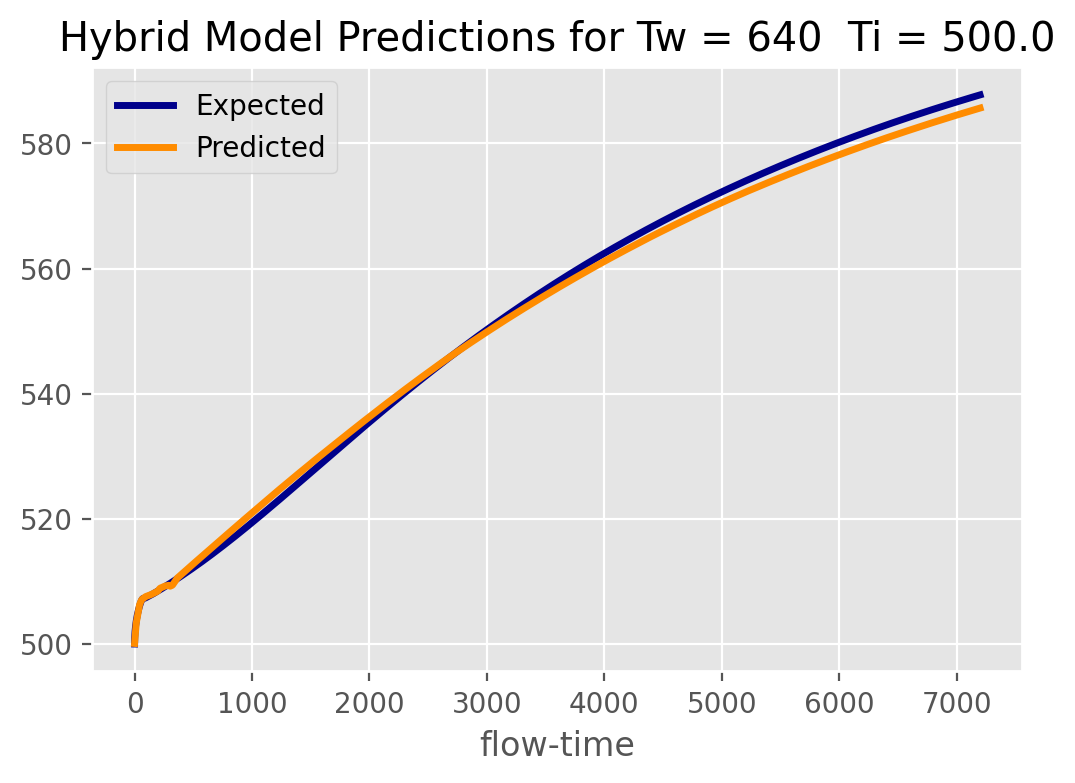

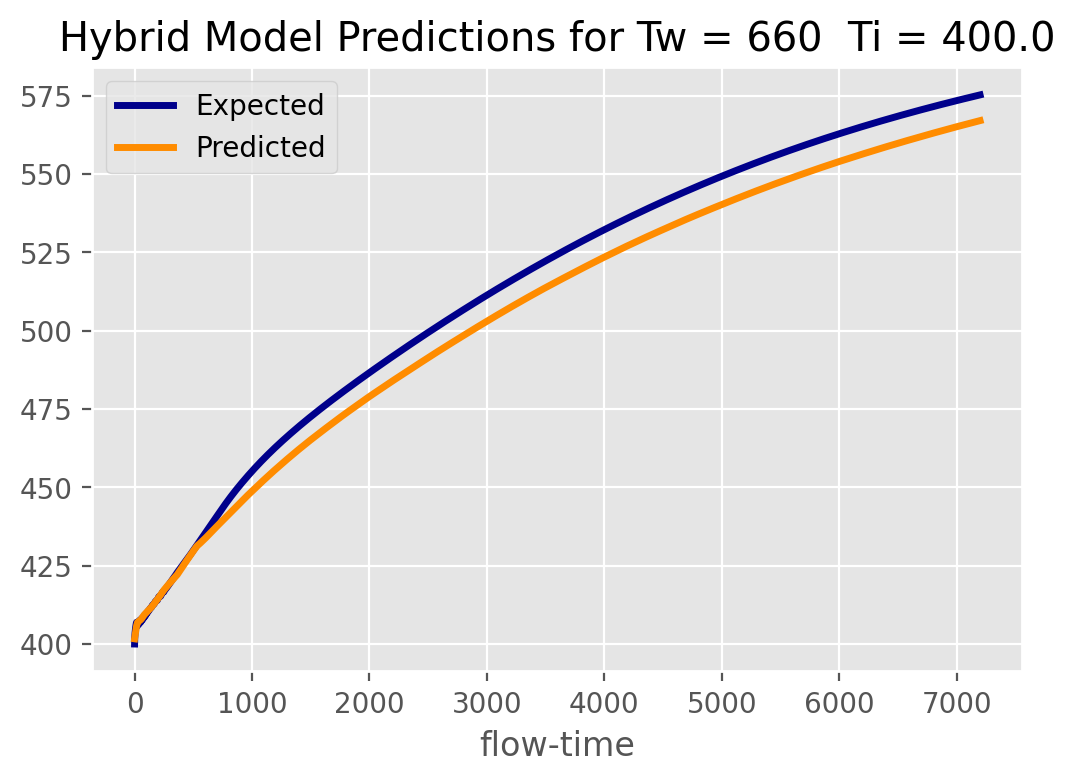

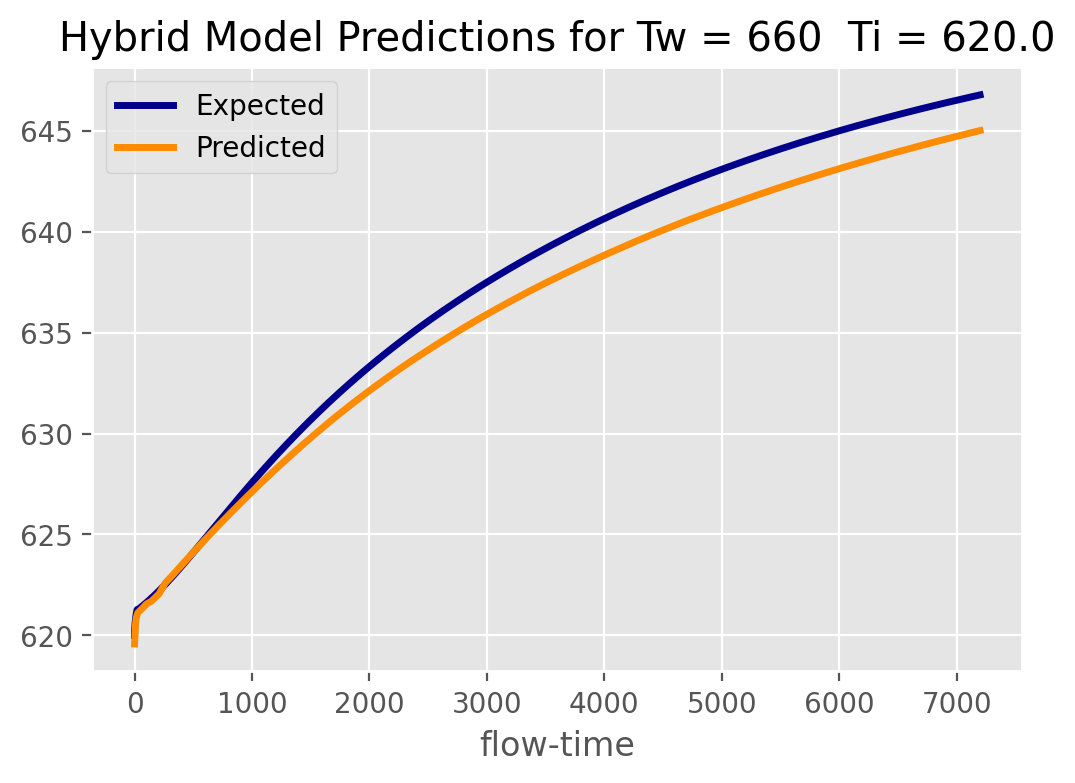

In [48]:
rmse, r2, figures = get_T_from_h_results(h_df, plot=True, hybrid_model=True, hybrid_split_time=360)

### Print the hybrid model metrics.

In [49]:
print(f'RMSE: {rmse}')
print(f'R2-score: {r2}')

RMSE: 2.5170309821900974
R2-score: 0.9977488062963555


### Save the figures

In [ ]:
if plot:
    figures_directory = save_figures(figures)